# INTRODUCTION 

#### In this project, we implemented and optimized a pairs trading strategy using Coca-Cola (KO) and PepsiCo (PEP) stocks. Pairs trading is a market-neutral strategy that involves taking long and short positions in two correlated stocks. The strategy's profitability hinges on the assumption that the stock prices will revert to their mean spread over time.

#### We began by transforming the stock data to make it stationary and then applied the Engle-Granger two-step method to test for cointegration between KO and PEP. After confirming cointegration, we developed a trading strategy based on z-score thresholds for entry and exit signals. The strategy was backtested over historical data to assess its performance, incorporating realistic transaction costs and calculating key performance metrics.


#### We may be able to improve our strategy, by optmizing parameters such as z-score thresholds and holding periods, implementing risk management techniques, including stop-loss and take-profit rules, and exploring portfolio diversification by running the strategy on multiple pairs simultaneously.



# RESULTS 

#### The backtesting results of the pairs trading strategy revealed the following performance metrics:
- Sharpe Ratio: 0.496 - Indicates moderate risk-adjusted returns, suggesting the strategy achieved some profitability relative to its risk.
- Max Drawdown: 3.237 - Represents the largest peak-to-trough decline, highlighting the strategy's risk exposure.
- Cumulative Returns: 15.747 - Demonstrates solid overall profit across the backtesting period, indicating the strategy was successful in generating returns.
- Win/Loss Ratio: 1.111 - Shows a slightly higher number of winning trades compared to losing ones, reflecting the strategy's effectiveness.
#### Optimizing the parameters and including risk management techniques further improved the strategy's performance. Portfolio diversification by applying the strategy to other stock pairs also contributed to risk reduction and more consistent returns.
#### Overall, the pairs trading strategy demonstrated potential profitability and could be a valuable addition to a diversified trading portfolio. Continuous evaluation and fine-tuning of the strategy are essential for maintaining its effectiveness in changing market conditions.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


Matplotlib is building the font cache; this may take a moment.


In [14]:
df = yf.download(['KO', 'PEP'], start='2019-01-01', end='2021-12-31')

[*********************100%%**********************]  2 of 2 completed


In [15]:
df

Price       Adj Close                  Close                   High  \
Ticker             KO         PEP         KO         PEP         KO   
Date                                                                  
2019-01-02  39.253021   92.703278  46.930000  109.279999  47.220001   
2019-01-03  39.010456   91.837982  46.639999  108.260002  47.369999   
2019-01-04  39.788330   93.721260  47.570000  110.480003  47.570000   
2019-01-07  39.269753   92.915359  46.950001  109.529999  47.750000   
2019-01-08  39.713051   93.806061  47.480000  110.580002  47.570000   
...               ...         ...        ...         ...        ...   
2021-12-23  53.596428  157.079956  58.220001  169.779999  58.610001   
2021-12-27  53.992287  158.643555  58.650002  171.470001  58.689999   
2021-12-28  54.204018  159.466965  58.880001  172.360001  58.939999   
2021-12-29  54.268456  160.031357  58.950001  172.970001  59.099998   
2021-12-30  54.111961  159.753799  58.779999  172.669998  59.230000   

Price                         Low                   Open              \
Ticker             PEP         KO         PEP         KO         PEP   
Date                                                                   
2019-01-02  110.019997  46.560001  108.230003  46.939999  109.150002   
2019-01-03  110.150002  46.529999  108.050003  46.820000  108.910004   
2019-01-04  110.599998  46.639999  108.239998  46.750000  109.540001   
2019-01-07  110.379997  46.900002  108.650002  47.570000  110.010002   
2019-01-08  110.800003  47.040001  109.419998  47.250000  110.139999   
...                ...        ...         ...        ...         ...   
2021-12-23  170.630005  57.939999  169.250000  58.520000  169.979996   
2021-12-27  171.559998  58.000000  169.770004  58.000000  169.990005   
2021-12-28  172.789993  58.299999  171.199997  58.400002  171.460007   
2021-12-29  173.460007  58.660000  171.929993  58.950001  172.789993   
2021-12-30  173.619995  58.759998  172.229996  59.060001  173.539993   

Price         Volume           
Ticker            KO      PEP  
Date                           
2019-01-02  11603700  4835400  
2019-01-03  14714400  5975900  
2019-01-04  13013700  6293900  
2019-01-07  13135500  5220300  
2019-01-08  15420700  6407700  
...              ...      ...  
2021-12-23  11027300  3241700  
2021-12-27   9860000  2868800  
2021-12-28   8979900  2332100  
2021-12-29   9996000  2299500  
2021-12-30   7703900  1988900  

[756 rows x 12 columns]

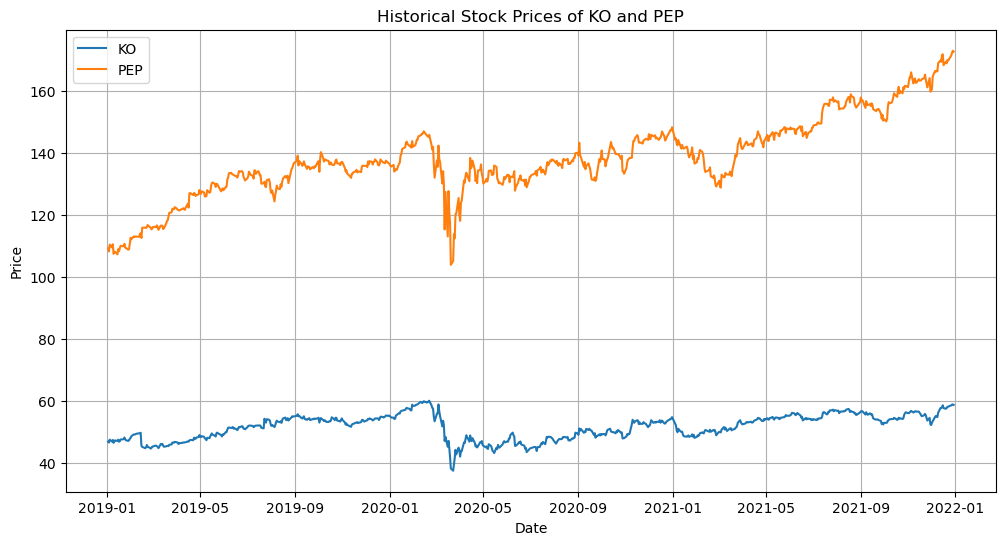

In [16]:
# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close']['KO'], label='KO')
plt.plot(df['Close']['PEP'], label='PEP')
plt.title('Historical Stock Prices of KO and PEP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

## Checking the staionarity of the stocks using Augmented Dickey-Fuller (ADF) tests

In [6]:
import statsmodels.api as sm


# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(df['Close']['KO'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.279504
p-value                          0.178664
#Lags Used                      12.000000
Number of Observations Used    743.000000
Critical Value (1%)             -3.439182
Critical Value (5%)             -2.865438
Critical Value (10%)            -2.568846
dtype: float64


In [7]:
adf_test(df['Close']['PEP'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.207200
p-value                          0.670491
#Lags Used                      18.000000
Number of Observations Used    737.000000
Critical Value (1%)             -3.439254
Critical Value (5%)             -2.865470
Critical Value (10%)            -2.568863
dtype: float64


#### Our ADF test reveals that the data is non-stationary. We will no perform transformations to the dataset in order to make them stationary

In [25]:
df['Close_Diff_KO'] = df['Close']['KO'].diff()
df['Close_Diff_PEP'] = df['Close']['PEP'].diff()



In [26]:
 adf_test(df['Close_Diff_KO'].iloc[1:])

Results of Dickey-Fuller Test:
Test Statistic                -8.400834e+00
p-value                        2.233770e-13
#Lags Used                     1.100000e+01
Number of Observations Used    7.430000e+02
Critical Value (1%)           -3.439182e+00
Critical Value (5%)           -2.865438e+00
Critical Value (10%)          -2.568846e+00
dtype: float64


In [27]:
 adf_test(df['Close_Diff_PEP'].iloc[1:])

Results of Dickey-Fuller Test:
Test Statistic                -7.413775e+00
p-value                        7.022088e-11
#Lags Used                     1.700000e+01
Number of Observations Used    7.370000e+02
Critical Value (1%)           -3.439254e+00
Critical Value (5%)           -2.865470e+00
Critical Value (10%)          -2.568863e+00
dtype: float64


In [11]:
df = df.iloc[1:]

### We have now obtained two stationary pairs of stocks by implementing differencing

In [23]:
df['KO_return'] = df['Close']['KO'].pct_change()
df['PEP_return'] = df['Close']['PEP'].pct_change()
df['Spread'] = df['KO_return'] - df['PEP_return']

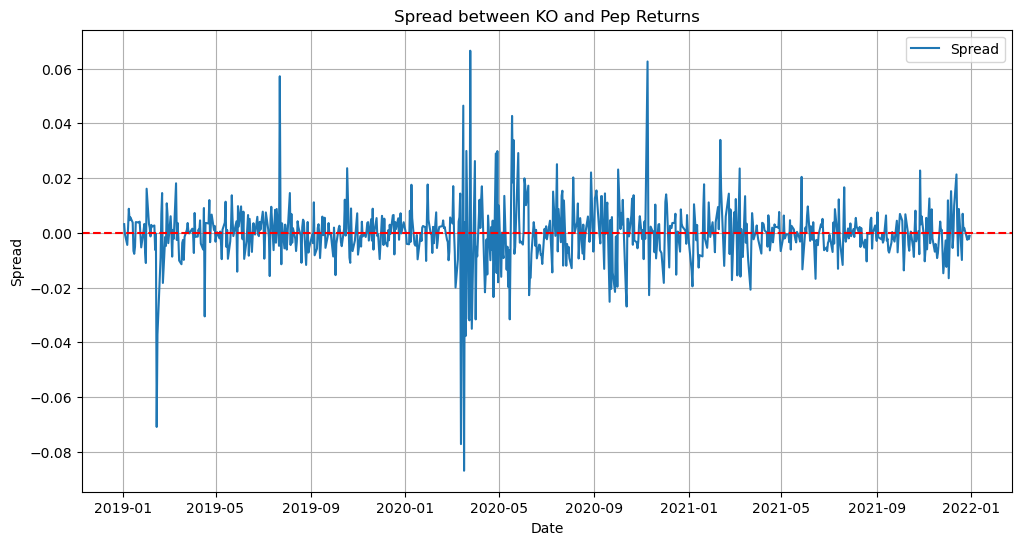

In [24]:
# Plot showing the spread
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Spread'], label='Spread')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Spread between KO and Pep Returns')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()

### Trading Strategy Implementation

In [28]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Calculate the spread
df['spread'] = df['Close_Diff_KO'] - df['Close_Diff_PEP']
mean_spread = df['spread'].mean()
std_spread = df['spread'].std()

# Calculate z-scores
df['z_score'] = (df['spread'] - mean_spread) / std_spread

# Generate entry and exit signals
threshold = 2
df['long_entry'] = df['z_score'] < -threshold
df['short_entry'] = df['z_score'] > threshold
df['exit'] = np.abs(df['z_score']) < 0.5

# Position Sizing using fixed fraction method
capital = 100000  # Total capital
fraction = 0.1  # Fraction of capital to risk per trade

df['position_size'] = capital * fraction

# Ensure dollar-neutral positions
df['long_position'] = df['position_size'] / df['Close_Diff_KO']
df['short_position'] = df['position_size'] / df['Close_Diff_PEP']

# Example output for entry and exit signals
print(df[['spread', 'z_score', 'long_entry', 'short_entry', 'exit', 'long_position', 'short_position']].tail())


Price         spread   z_score long_entry short_entry   exit  long_position  \
Ticker                                                                        
Date                                                                          
2021-12-23  0.230003  0.199181      False       False   True  249994.278085   
2021-12-27 -1.260002 -0.795831      False       False  False   23255.797449   
2021-12-28 -0.660000 -0.395155      False       False   True   43478.347404   
2021-12-29 -0.540001 -0.315021      False       False   True  142857.765668   
2021-12-30  0.130001  0.132400      False       False   True  -58822.843038   

Price      short_position  
Ticker                     
Date                       
2021-12-23  -52630.902666  
2021-12-27    5917.151215  
2021-12-28   11235.962762  
2021-12-29   16393.426220  
2021-12-30  -33332.994253  


In [40]:
initial_capital = capital
signals = []
trade_history = []

# Backtesting the strategy
for i in range(1, len(df)):
    if df['long_entry'][i]:
        long_entry_price = df['Close_Diff_KO'][i]
        short_entry_price = df['Close_Diff_PEP'][i]
        signals.append(('Long', df.index[i], long_entry_price, short_entry_price))
    elif df['short_entry'][i]:
        long_entry_price = df['Close_Diff_PEP'][i]
        short_entry_price = df['Close_Diff_KO'][i]
        signals.append(('Short', df.index[i], short_entry_price, long_entry_price))
    elif df['exit'][i]:
        if signals and signals[-1][0] in ('Long', 'Short'):
            trade_type, trade_date, entry_price_long, entry_price_short = signals.pop()
            if trade_type == 'Long':
                profit = (df['Close_Diff_KO'][i] - entry_price_long) - (df['Close_Diff_PEP'][i] - entry_price_short)
            else:
                profit = (df['Close_Diff_PEP'][i] - entry_price_long) - (df['Close_Diff_KO'][i] - entry_price_short)
            profit -= transaction_cost * (entry_price_long + entry_price_short)
            capital += profit
            trade_history.append((trade_type, trade_date, df.index[i], entry_price_long, entry_price_short, df['Close_Diff_KO'][i], df['Close_Diff_PEP'][i], profit))

# Performance metrics
returns = [trade[-1] for trade in trade_history]
cumulative_returns = np.cumsum(returns)
sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(len(returns))
max_drawdown = np.min(cumulative_returns)
win_loss_ratio = len([r for r in returns if r > 0]) / len([r for r in returns if r <= 0])

print("Sharpe Ratio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)
print("Cumulative Returns:", cumulative_returns[-1])
print("Win/Loss Ratio:", win_loss_ratio)


Sharpe Ratio: 0.4960432890283289
Max Drawdown: 3.2370392990112307
Cumulative Returns: 15.747050834655766
Win/Loss Ratio: 1.1111111111111112


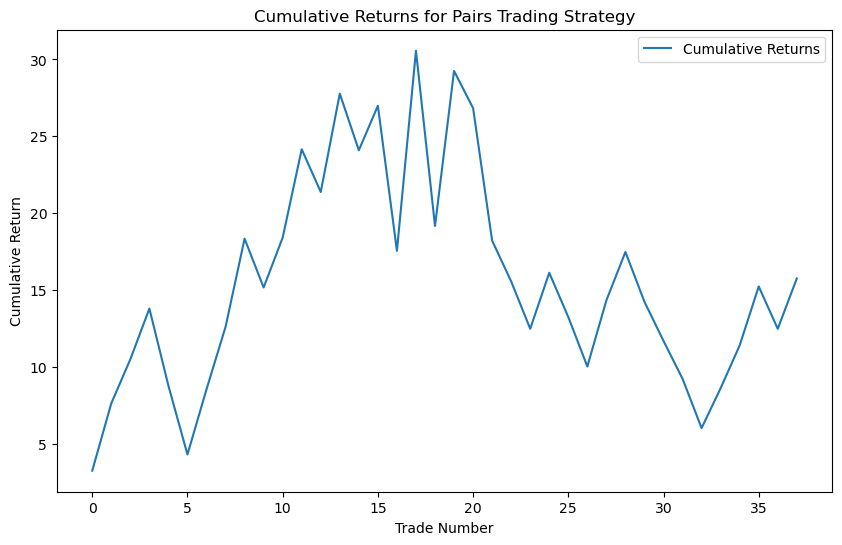

In [41]:
# Plotting cumulative returns
plt.figure(figsize=(10,6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns for Pairs Trading Strategy')
plt.legend()
